# Project: Investigate a Movie Dataset 
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [249]:
# Load data and print out a few lines
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [251]:
df.describe([0.01,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
id,10866.0,6.606418e+04,9.213014e+04,5.000000,204.300000,3362.500000,10596.250000,20669.000000,7.561000e+04,2.422670e+05,3.475298e+05,4.178590e+05
popularity,10866.0,6.464410e-01,1.000185e+00,0.000065,0.011754,0.105708,0.207583,0.383856,7.138170e-01,1.350653e+00,4.581144e+00,3.298576e+01
budget,10866.0,1.462570e+07,3.091321e+07,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000e+07,4.600000e+07,1.500000e+08,4.250000e+08
revenue,10866.0,3.982332e+07,1.170035e+08,0.000000,0.000000,0.000000,0.000000,0.000000,2.400000e+07,1.129462e+08,5.872457e+08,2.781506e+09
runtime,10866.0,1.020709e+02,3.138141e+01,0.000000,7.000000,83.000000,90.000000,99.000000,1.110000e+02,1.270000e+02,1.840000e+02,9.000000e+02
vote_count,10866.0,2.173897e+02,5.756191e+02,10.000000,10.000000,12.000000,17.000000,38.000000,1.457500e+02,5.080000e+02,3.018500e+03,9.767000e+03
vote_average,10866.0,5.974922e+00,9.351418e-01,1.500000,3.400000,4.800000,5.400000,6.000000,6.600000e+00,7.100000e+00,7.900000e+00,9.200000e+00
release_year,10866.0,2.001323e+03,1.281294e+01,1960.000000,1963.000000,1982.000000,1995.000000,2006.000000,2.011000e+03,2.014000e+03,2.015000e+03,2.015000e+03
budget_adj,10866.0,1.755104e+07,3.430616e+07,0.000000,0.000000,0.000000,0.000000,0.000000,2.085325e+07,5.811259e+07,1.623004e+08,4.250000e+08
revenue_adj,10866.0,5.136436e+07,1.446325e+08,0.000000,0.000000,0.000000,0.000000,0.000000,3.369710e+07,1.483823e+08,6.987106e+08,2.827124e+09


### Data Cleaning 

>* These columns has missing data: **imdb_id**, **cast**, **homepage**, **director**, **tagline**, **keywords**, **overview**, **genres**, **production_companies**. Among these columns, homepage has the most missing data, So I discard this column.
>* The column **genres** will be discussed in the following parts, so rows with missing values are dropped.
>* **genres** for each year is a string need to be splited.
>* Summing up the number of movies produced for each year is needed.

In [252]:
#Drop the columns with too many missing data
df.drop(columns=['homepage'], inplace=True)
df.dropna(subset=['genres'], inplace=True)

>To discuss the popular genre trending, columns **genres**, **release_year** are selected to form a new dataframe called **pop**.

In [253]:
#Form a new dataframe for convenience of further discussing
pop = df[['genres','release_year']]
pop.head()

,genres,release_year
0,Action|Adventure|Science Fiction|Thriller,2015
1,Action|Adventure|Science Fiction|Thriller,2015
2,Adventure|Science Fiction|Thriller,2015
3,Action|Adventure|Science Fiction|Fantasy,2015
4,Action|Crime|Thriller,2015


>**genres** has multiple descriptions, so I utilize `apply` to split genres and save them as lists in column **genres_list**.

In [254]:
pop['genres_list'] = pop.groupby(by='release_year')['genres'].apply(lambda x: x.str.split('|'))

C:\Users\HUA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [255]:
pop.head()

,genres,release_year,genres_list
0,Action|Adventure|Science Fiction|Thriller,2015,"[Action, Adventure, Science Fiction, Thriller]"
1,Action|Adventure|Science Fiction|Thriller,2015,"[Action, Adventure, Science Fiction, Thriller]"
2,Adventure|Science Fiction|Thriller,2015,"[Adventure, Science Fiction, Thriller]"
3,Action|Adventure|Science Fiction|Fantasy,2015,"[Action, Adventure, Science Fiction, Fantasy]"
4,Action|Crime|Thriller,2015,"[Action, Crime, Thriller]"


In [256]:
'''Split genres for each row and saving the data according to year'''
time_max_genres = {} #The most popular genre for each year
yearly_summary = {} #Number of movies produced in each genre for each year 
years = set(pop['release_year'].values)
for year in years:
    yearly_movie = pop[pop['release_year']==year]
    yearly_genre = {}
    for each in yearly_movie['genres_list']:
        for gen in range(len(each)):
            if each[gen] not in yearly_genre:
                yearly_genre[each[gen]] = 1
            else:
                yearly_genre[each[gen]] += 1
    yearly_summary[str(year)] = yearly_genre #Summmary of genres for each year
    time_max_genres[str(year)] = sorted(yearly_genre.items(), key = lambda item: item[1], reverse=True)[0] #The most popular genre for each year

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 How is the annual revenue changes over time?

In [257]:
yearly_revenue = dict(df.groupby(by='release_year')['revenue_adj'].sum())
x = list(yearly_revenue.keys())
y = list(yearly_revenue.values())

Text(0, 0.5, 'Revenue_adj')

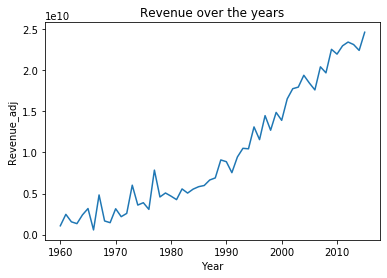

In [258]:
plt.plot(x,y)
plt.title('Revenue over the years')
plt.xlabel('Year')
plt.ylabel('Revenue_adj')

>According to the graph above, the overall revenue are growing over the years despite minor fluctuation. But this could due to the limitation of dataset, especially half of the revenue are left as 0. To veify the marketing prosperity, further research is needed.

>If we assume this is a valid observation, my next question is what are the most popular genres for each year and how it changes over time?

### Research Question 2 Which generes are most popular from year to year?

>The most popular movie genres for each year have been saved in **time_max_genre**. Plot a graph accordingly to visualize the popular trend.

Text(0.5, 1.0, 'Popular genres over time')

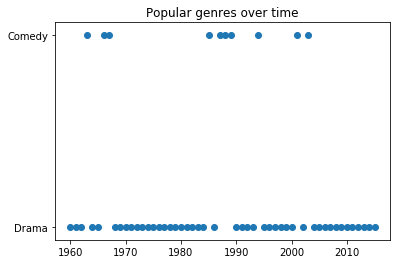

In [259]:
time_year = list(int(y) for y in time_max_genres.keys())
most_pop_genres = [i[0] for i in time_max_genres.values()]
plt.scatter(time_year, most_pop_genres)
plt.title('Popular genres over time')

In [260]:
most_pop_genres_df = pd.DataFrame(time_year,most_pop_genres)
most_pop_genres_df.index.value_counts()

Drama     46
Comedy    10
dtype: int64

In [261]:
ratio_drama = most_pop_genres_df.index.value_counts()[0]/most_pop_genres_df.index.value_counts().sum()
ratio_comedy = most_pop_genres_df.index.value_counts()[1]/most_pop_genres_df.index.value_counts().sum()

In [262]:
#Ratio of drama
ratio_drama

0.8214285714285714

In [263]:
#Ratio of comedy
ratio_comedy

0.17857142857142858

>Plot a line chart to pie chart to see the proportions of these two genres.

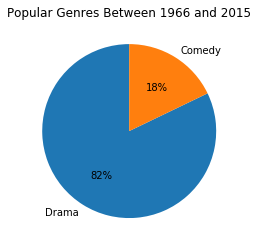

In [264]:
plt.figure()
plt.pie([ratio_drama, ratio_comedy]
        ,labels=['Drama','Comedy']
        ,autopct='%.0f%%'
        ,startangle=90)
plt.title('Popular Genres Between 1966 and 2015')
plt.show()

> By looking at the scatter plot and pie chart, it is obvious that genre *drama* is more popular over the years. This observation brings another question: how is this genre and comedy popularity change over time?

### Research Question 3  How the market share of these two popular genres change over time?

In [265]:
#Total number of movies produce in each year
yearly_movie_n = df.groupby('release_year')['genres'].count() 

In [266]:
#Get the percentage of drama and comedy of each year
for key in yearly_summary:
    year_drama_ratio = {}
    year_comedy_ratio = {}
    for year in yearly_summary.keys():
        year_drama = yearly_summary[year]['Drama']
        year_comedy = yearly_summary[year]['Comedy']
        year_drama_ratio[year] = year_drama/yearly_movie_n[int(year)]
        year_comedy_ratio[year] = year_comedy/yearly_movie_n[int(year)] 

>To visualize the change of both genres accordingly, plot a line chart as follows.

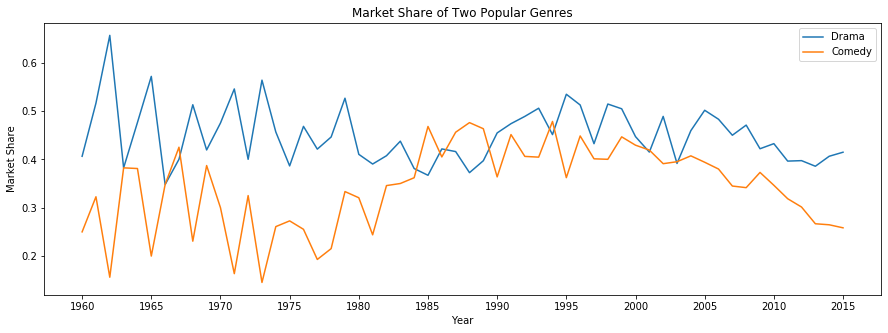

In [267]:
x = list(year_drama_ratio.keys())
y_drama = list(year_drama_ratio.values())
y_comedy = list(year_comedy_ratio.values())

plt.figure(figsize=(15,5))
plt.plot(x, y_drama,label='Drama')
plt.plot(x, y_comedy, label='Comedy')

xtick = x[::5]
plt.xticks(xtick)

plt.xlabel('Year')
plt.ylabel('Market Share')

plt.title('Market Share of Two Popular Genres')
plt.legend()

>Accoding to the graph above, market share of **drama** is relatively steady over the time, but for **comedy**, it has a continuous increase between 1972 abd 1989, and then shows a gradual decrease.

<a id='conclusions'></a>
## Conclusions

>By exploring the imdb movie dataset, if we consider the data provided only, we draw following conclusions:
>* Movie market is growing over the time.
>* Among the decades, the most popular genres have been **comedy** and **drama**. But if we considering the frequency, **drama** is even more popular than **comedy**.
>* By looking at the line chart for both popular genres, **comedy** has an increase followed by gradual decrease, while **drama** has little fluctuate and a overall steady behavior.
